# Evading SVMs

In this section we will be training an SVM (support vector machine) to distinguish between the digits 0 and 1. The data is coming from the MNIST dataset which contains handwritten digits. We will be using `scikit-learn` to train our SVM.

First let's start out by importing a few essentials.

In [ ]:
from sklearn import svm
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist

Since we are only interested in the 1s and 0s in the data, we will need to pick those out. Since we need to this for both the test and training data, let's write a function for it.

This function does a few other things as well.
- It normalizes the data, bringing it into the interval [0,1]
- It is also only using part of the data to make things a bit faster
- It also reshapes the data so we can use it with SVMs

In [ ]:
def exract_ones_and_zeroes(data, labels, number):
    # select data with label 0/1 (Tip: use np.argwhere() function)
    data_zeroes = ...
    data_ones = ...

    x = np.vstack(...)

    # Normalization
    x = x.reshape(x.shape[0], -1) / 255.0
    # data_zeroes = data_zeroes.reshape(data_zeroes.shape[0], -1) / 255.0
    # data_ones = data_ones.reshape(data_ones.shape[0], -1) / 255.0
    # x = np.vstack((data_zeroes,data_ones))

    print(x.shape)

    # prepare labels
    labels_zeroes = ...
    labels_ones = ...
    y = np.append(...)

    return x, y

Next we need to load the data and spilt it into training and testing sets.

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# extract ones and zeroes
x_train, y_train = ...
x_test, y_test = ...

(200, 784)
(20, 784)


We are going to define a SVM with a RBF (radial basis function) kernel and train it.
Once training is done we are going to print the accuracy and show one of the images.

In [ ]:
# Use SVM to train and test data
clf = svm.SVC(...)
clf.fit( ...)
print( 'accuracy on test set:', ...)

accuracy on test set: 1.0


To evade the classifier, we first pick a sample that we want to change. After that we need to retrieve some of the parameters of the SVM which we will need to calculate the gradients.

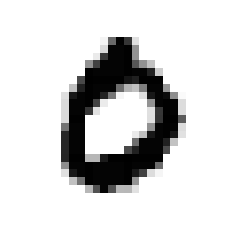

In [ ]:
# choose a sample and then predict the sample's label
plt.imshow( x_test[ 0 ].reshape( 28, 28 ), cmap="gray_r" )
plt.axis( 'off' )
plt.show( )

In [ ]:
sample = x_test[11]
print( 'class prediction for the test samples:', clf.predict( [ sample ] ) )

class prediction for the test samples: [1.]


Now that we have the internal parameters we can calcuate the gradients of the SVM and apply the modifications to our selected sample.

In [ ]:
# Retrieve the internal parameters from the SVM
alpha = clf.dual_coef_
svs = clf.support_vectors_
nsv = svs.shape[ 0 ]
b = clf.intercept_

# lambda, strength of the modification
lmbd = 10.6

# the sample we modify
mod_sample = sample[ : ]

# Compute the kernel row matrix and kernel gradients for xc
kgrad = np.empty( svs.shape )

# do multiple update rounds
for n in range(1):
    # for all support vectors
    for i in range( nsv ):
        sv = ... # select each support vector x_i
        k = ... # Compute the kernel gradient for x_i
        kgrad[ i, : ] = ...
    grad = ...
    # modify the sample use the gradient
    mod_sample = np.clip( ... )

mod_sample = np.clip( mod_sample, 0., 1.)

print( 'class prediction for the original sample:', ...)
print( 'class prediction for the modified sample:', ...)
print( 'original sample:')
plt.imshow( sample.reshape( 28, 28 ), cmap="gray_r" )
plt.show( )
print( 'modified sample:')
plt.imshow( mod_sample.reshape( 28, 28 ), cmap="gray_r" )
plt.show( )


print( 'difference between the two samples:')
plt.imshow( np.abs(sample-mod_sample).reshape( 28, 28 ), cmap="gray_r" )
plt.show( )